#Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC ,SVR
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

Reading dataset and make some operations and visualization

In [3]:
#Readind dataset
Data = pd.read_csv('WineQT.csv')
#Data.drop(columns="Id",inplace=True)
#Data.drop('Id',axis=1)
del Data['Id']

In [4]:
#Here I will subtract 3 from the quality column to change the range of quality column from 3-8 to 0-5
Data['quality'] = Data['quality']-3
Data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,3
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3


In [5]:
Data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,4
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,2


In [6]:
Data.head(10).style.background_gradient(cmap='Reds')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,2
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,2
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,2
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,3
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,2
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,2
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,2
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,4
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,4
9,6.700000,0.580000,0.080000,1.800000,0.097000,15.000000,65.000000,0.995900,3.280000,0.540000,9.200000,2


In [7]:
Data.sample(10).style.background_gradient(cmap='Reds')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
938,6.700000,0.460000,0.240000,1.700000,0.077000,18.000000,34.000000,0.994800,3.390000,0.600000,10.600000,3
194,7.900000,0.545000,0.060000,4.000000,0.087000,27.000000,61.000000,0.996500,3.360000,0.670000,10.700000,3
524,7.700000,0.560000,0.200000,2.000000,0.075000,9.000000,39.000000,0.998700,3.480000,0.620000,9.300000,2
234,13.400000,0.270000,0.620000,2.600000,0.082000,6.000000,21.000000,1.000200,3.160000,0.670000,9.700000,3
218,8.300000,0.705000,0.120000,2.600000,0.092000,12.000000,28.000000,0.999400,3.510000,0.720000,10.000000,2
16,8.500000,0.490000,0.110000,2.300000,0.084000,9.000000,67.000000,0.996800,3.170000,0.530000,9.400000,2
159,8.600000,0.645000,0.250000,2.000000,0.083000,8.000000,28.000000,0.998150,3.280000,0.600000,10.000000,3
84,8.800000,0.550000,0.040000,2.200000,0.119000,14.000000,56.000000,0.996200,3.210000,0.600000,10.900000,3
52,6.800000,0.785000,0.000000,2.400000,0.104000,14.000000,30.000000,0.996600,3.520000,0.550000,10.700000,3
1003,6.400000,0.470000,0.400000,2.400000,0.071000,8.000000,19.000000,0.996300,3.560000,0.730000,10.600000,3


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [9]:
Data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,2.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,2.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,3.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000


In [10]:
Data.mean()

fixed acidity            8.311111
volatile acidity         0.531339
citric acid              0.268364
residual sugar           2.532152
chlorides                0.086933
free sulfur dioxide     15.615486
total sulfur dioxide    45.914698
density                  0.996730
pH                       3.311015
sulphates                0.657708
alcohol                 10.442111
quality                  2.657043
dtype: float64

In [11]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [12]:
Data.describe().T.style.background_gradient(cmap = 'Blues')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


Data preprocessing

In [13]:
Data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
Data.duplicated().sum()

125

In [15]:
Data.drop_duplicates(inplace = True)

In [16]:
Data.duplicated().sum()

0

In [17]:
Data['quality'].value_counts()

2    433
3    409
4    122
1     33
5     15
0      6
Name: quality, dtype: int64

<Figure size 1500x1000 with 0 Axes>

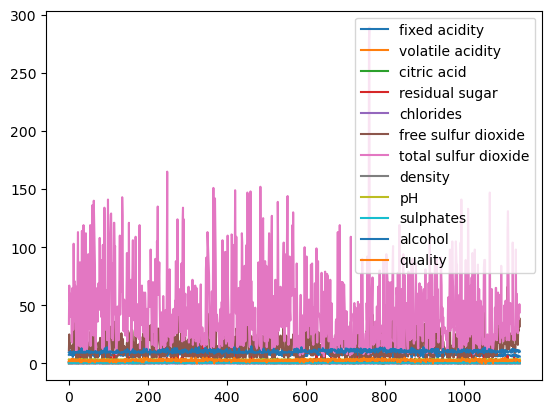

In [18]:
plt.figure(figsize = (15,10))
Data.plot()
plt.show()

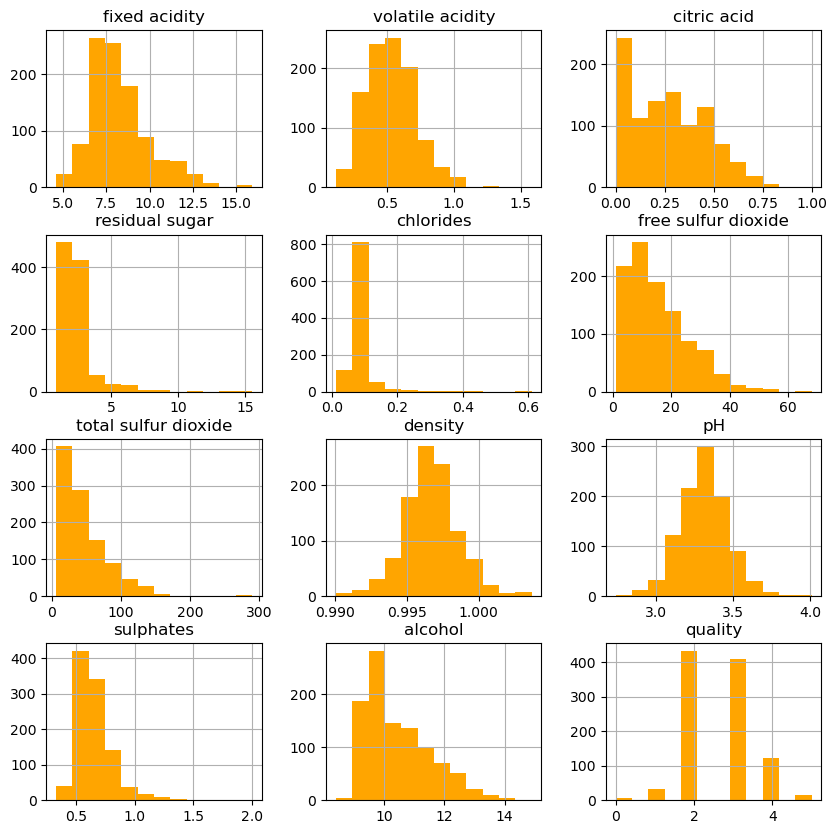

In [19]:
Data.hist(bins=12, figsize=(10,10),color = ('orange'))
plt.show()

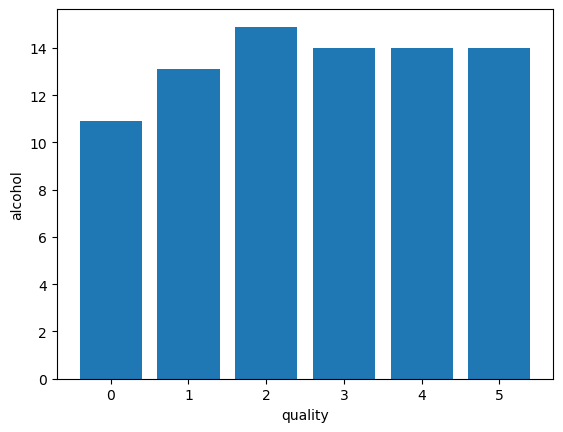

In [20]:
plt.bar(Data['quality'], Data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

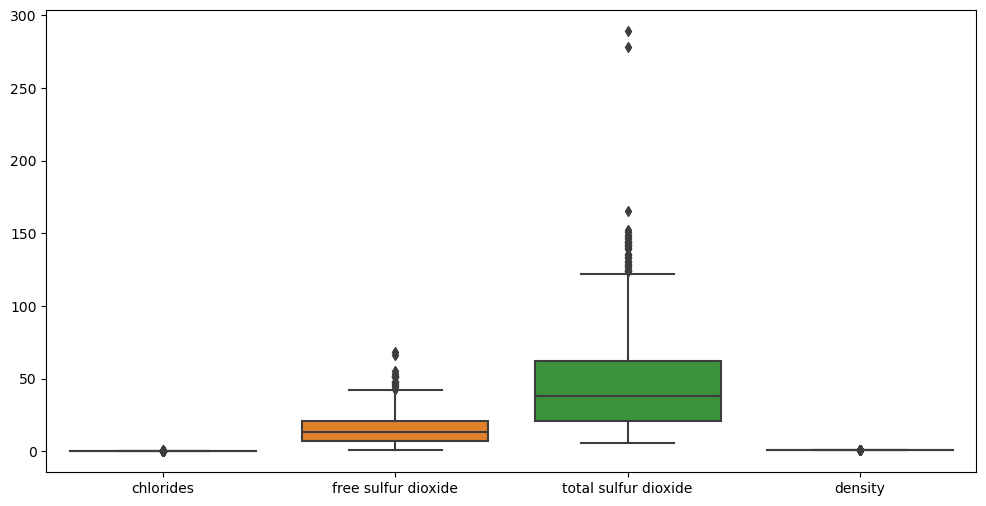

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=Data[Data.columns[4:8]])
plt.show()

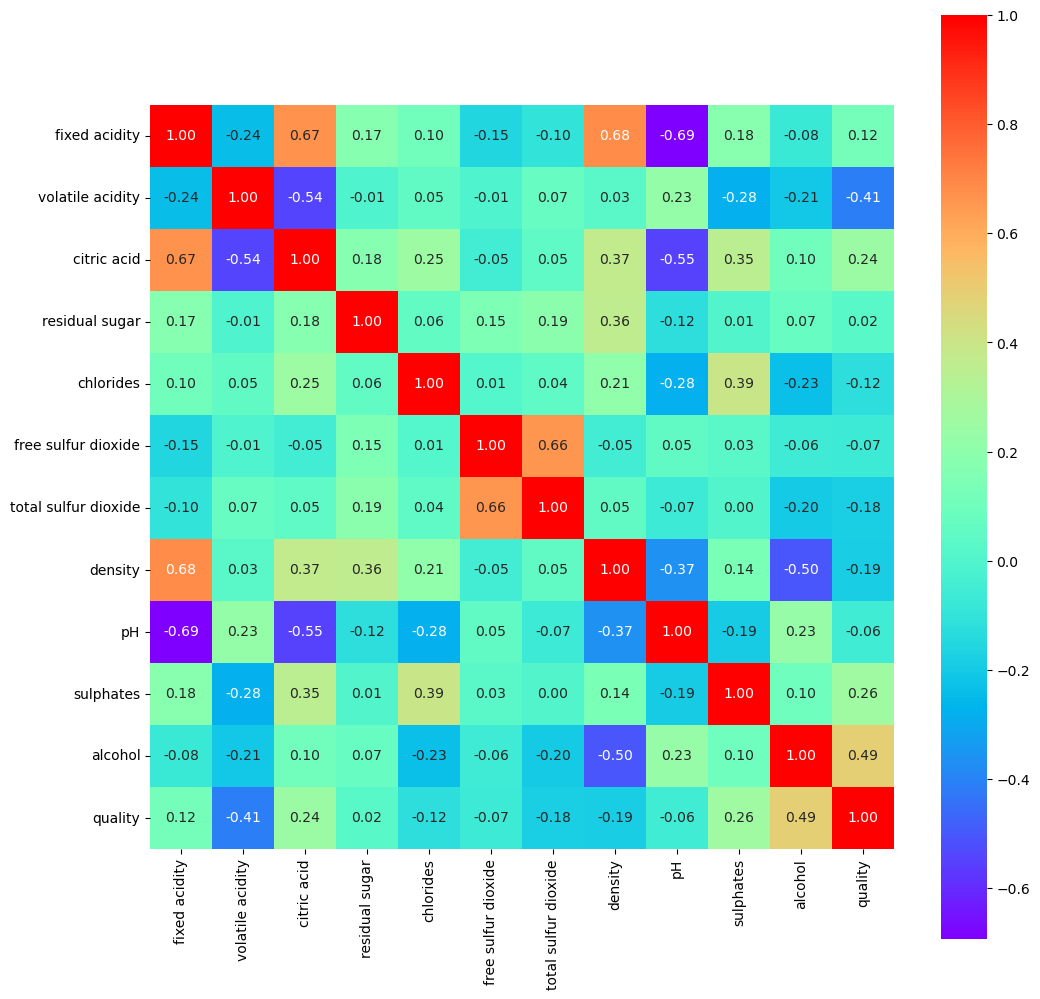

In [22]:
plt.figure(figsize=(12, 12))
sns.heatmap(Data.corr(), cbar=True, square=True, fmt='.2f', annot=True, cmap='rainbow')
plt.show()

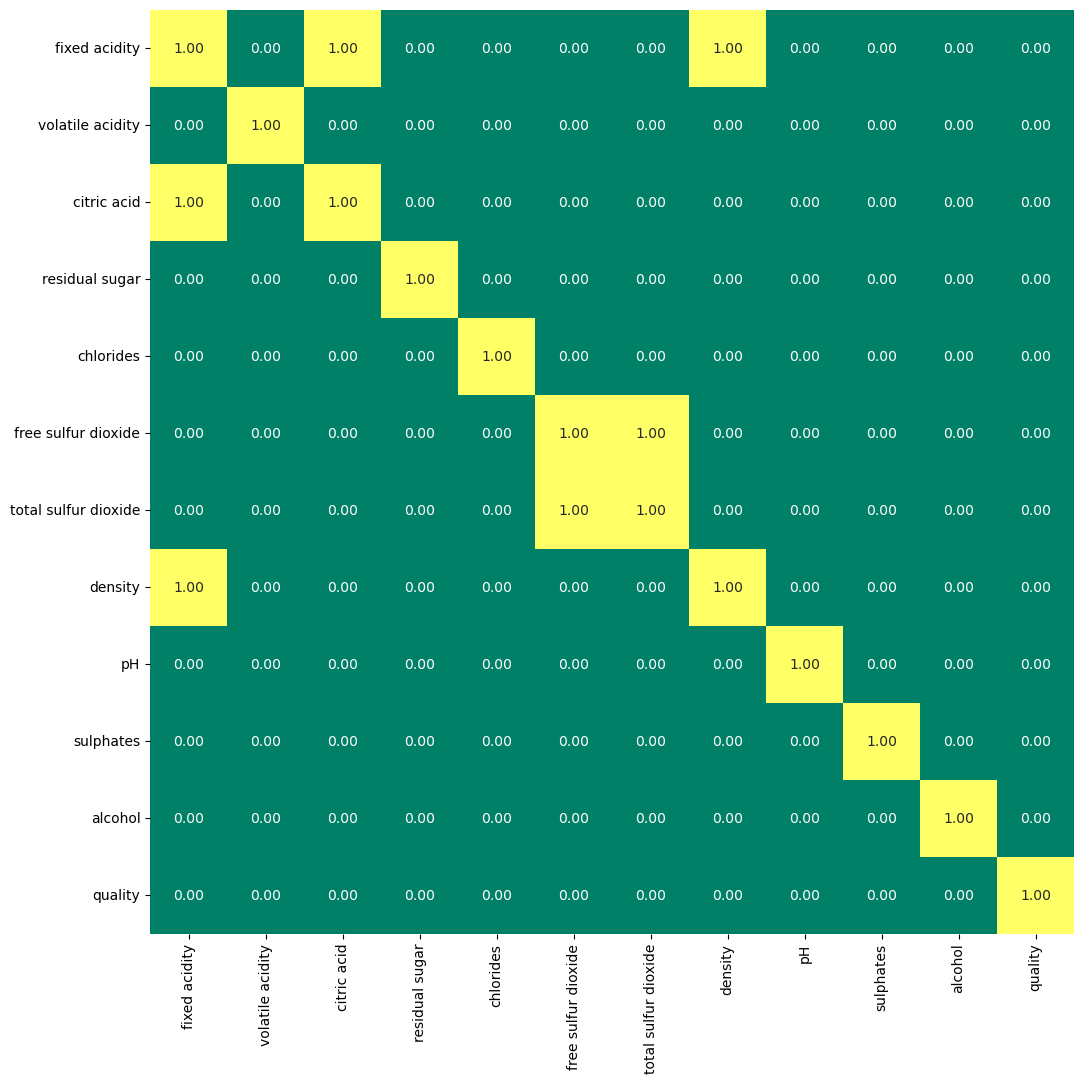

In [23]:
plt.figure(figsize=(12, 12))
sns.heatmap(Data.corr() > 0.6, cbar=False, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='summer')
plt.show()

In [24]:
Data = Data.drop('total sulfur dioxide', axis=1)

In [25]:
Data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,3
5,7.4,0.660,0.00,1.8,0.075,13.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,3
1139,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,3
1140,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,2
1141,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,3


-----Training models

In [26]:
X = Data.drop(columns="quality")           
y = Data["quality"]

In [27]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
norm = MinMaxScaler()
x_train = norm.fit_transform(X_train)
x_test = norm.fit_transform(X_test)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (814, 10)
X Test  :  (204, 10)
Y Train :  (814,)
Y Test  :  (204,)


In [28]:
# Logistic Regression
Lo_model=LogisticRegression(solver='liblinear')

Lo_model.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", Lo_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Lo_model.score(X_test,y_test))

y_pred_Lo=Lo_model.predict(X_test)

print( " Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_Lo)) 

print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_Lo))

Score the X-train with Y-train is :  0.5773955773955773
Score the X-test  with Y-test  is :  0.5735294117647058
 Model Evaluation Logistic R : mean absolute error is  0.46568627450980393
 Model Evaluation Logistic R : mean squared  error is  0.553921568627451
 Model Evaluation Logistic R : median absolute error is  0.0
 Model Evaluation Logistic R : accuracy score  0.5735294117647058


In [30]:
#Decision Tree Classifier
Tree_model=DecisionTreeClassifier(max_depth=50)
Tree_model.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.4852941176470588


In [31]:
# Select  Important columns
print("The Important columns \n",Tree_model.feature_importances_)

The Important columns 
 [0.06599664 0.13305275 0.07355068 0.08670042 0.05961014 0.10778778
 0.08055101 0.0905316  0.10434411 0.19787488]


In [32]:
Data.head(0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality


In [33]:
print("The classes ",Tree_model.classes_)
y_pred_T =Tree_model.predict(X_test)
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

The classes  [0 1 2 3 4 5]
 Model Evaluation Decision Tree : accuracy score  0.4852941176470588


In [34]:
# SVC
svc_model=SVC(C=50,kernel="rbf")
svc_model.fit(X_train,y_train)
y_pred_svc =svc_model.predict(X_test)
print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.6044226044226044
Score the X-test  with Y-test  is :  0.5588235294117647
 Model Evaluation Decision Tree : accuracy score  0.5588235294117647


In [35]:
# K Neighbors Classifier
K_model = KNeighborsClassifier(n_neighbors = 8)
K_model.fit(X_train, y_train)
y_pred_k = K_model.predict(X_test
print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))

Score the X-train with Y-train is :  0.6363636363636364
Score the X-test  with Y-test  is :  0.5245098039215687
 Model Evaluation K Neighbors Classifier : accuracy score  0.5245098039215687


^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Thanks--

Mahmoud Mohamed Rady,Machine Learning(AI)student. 9/2023

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^